In [76]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
path = os.getcwd() + '\\' + 'Data' + '\\'
data = pd.read_excel(path + 'F1 Schedule 2022.xlsx')
data2 = pd.read_excel(path + 'F1 Drivers 2022.xlsx')

In [313]:
data.head()

,Round,Circuit,Location,Date,Circuit Length (km),Laps,Race Length (km),Most Wins (driver - times),2021 Pole Position,2021 Winner,2021 Second Place,2021 Third Place,2021 Fastest Lap (driver - time),2022 Pole Position,2022 Winner,2022 Second Place,2022 Third Place,2022 Fastest Lap (driver - time)
0,1,Bahrain International Circuit,Bahrain,2022-03-20,5412,57,308238,Lewis Hamilton - 5,Max Verstappen,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Valtteri Bottas - 1:32.090,Charles Leclerc,Charles Leclerc,Carlos Sainz,Lewis Hamilton,Charles Leclerc - 1:34.570
1,2,Jeddah Corniche Circuit,Saudia Arabia,2022-03-27,6174,50,308450,Lewis Hamilton - 1,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Lewis Hamilton - 1:30.734,NaN,NaN,NaN,NaN,NaN
2,3,Albert Park Circuit,Australia,2022-04-10,5279,58,306240,Michael Schumacher - 4,Lewis Hamilton,Valtteri Bottas,Lewis Hamilton,Max Verstappen,Valtteri Bottas - 1:25.580,NaN,NaN,NaN,NaN,NaN
3,4,Autodromo Internazionale Enzo e Dino Ferrari,Italy,2022-04-24,4909,63,309049,Max Verstappen - 1,Lewis Hamilton,Max Verstappen,Lewis Hamilton,Lando Norris,Lewis Hamilton - 1:16.702,NaN,NaN,NaN,NaN,NaN
4,5,Miami International Autodrome,United States,2022-05-08,5410,57,308370,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN


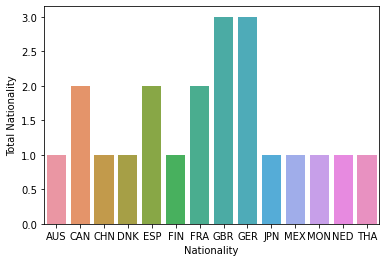

In [368]:
data2['nationality2'] = data2['Nationality']
data2_ns = data2.groupby(['Nationality']).agg({'nationality2':'count'}).reset_index().rename(columns={'nationality2':'Total Nationality'})
sns.barplot(x = 'Nationality', y= 'Total Nationality', data=data2_ns);

In [314]:
#delete data index-5 because to much missing variable
data.iloc[4:5,:]

,Round,Circuit,Location,Date,Circuit Length (km),Laps,Race Length (km),Most Wins (driver - times),2021 Pole Position,2021 Winner,2021 Second Place,2021 Third Place,2021 Fastest Lap (driver - time),2022 Pole Position,2022 Winner,2022 Second Place,2022 Third Place,2022 Fastest Lap (driver - time)
4,5,Miami International Autodrome,United States,2022-05-08,5410,57,308370,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [315]:
data.dropna(axis = 1, inplace = True)
data.drop(index=data.iloc[4:5,:].index.tolist(), inplace = True)

In [122]:
data.head(5)

,Round,Circuit,Location,Date,Circuit Length (km),Laps,Race Length (km),Most Wins (driver - times),2021 Pole Position,2021 Winner,2021 Second Place,2021 Third Place,2021 Fastest Lap (driver - time),Pole Position,Winner,Second,Third
0,1,Bahrain International Circuit,Bahrain,2022-03-20,5412,57,308238,Lewis Hamilton - 5,Max Verstappen,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Valtteri Bottas - 1:32.090,Max Verstappen,Lewis Hamilton,Max Verstappen,Valtteri Bottas
1,2,Jeddah Corniche Circuit,Saudia Arabia,2022-03-27,6174,50,308450,Lewis Hamilton - 1,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Lewis Hamilton - 1:30.734,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Valtteri Bottas
2,3,Albert Park Circuit,Australia,2022-04-10,5279,58,306240,Michael Schumacher - 4,Lewis Hamilton,Valtteri Bottas,Lewis Hamilton,Max Verstappen,Valtteri Bottas - 1:25.580,Lewis Hamilton,Valtteri Bottas,Lewis Hamilton,Max Verstappen
3,4,Autodromo Internazionale Enzo e Dino Ferrari,Italy,2022-04-24,4909,63,309049,Max Verstappen - 1,Lewis Hamilton,Max Verstappen,Lewis Hamilton,Lando Norris,Lewis Hamilton - 1:16.702,Lewis Hamilton,Max Verstappen,Lewis Hamilton,Lando Norris
5,6,Circuit de Barcelona-Catalunya,Spain,2022-05-22,4675,66,308424,Lewis Hamilton - 6,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Max Verstappen - 1:18.149,Lewis Hamilton,Lewis Hamilton,Max Verstappen,Valtteri Bottas


In [316]:
data['Pole Position'] = data['2021 Pole Position']
data['Winner'] = data['2021 Winner']
data['Second'] = data['2021 Second Place']
data['Third'] = data['2021 Third Place']

df_pole = data.groupby(['2021 Pole Position']).agg({'Pole Position':'count'}).reset_index()
df_winner = data.groupby(['2021 Winner']).agg({'Winner':'count'}).reset_index()
df_second = data.groupby(['2021 Second Place']).agg({'Second':'count'}).reset_index()
df_third = data.groupby(['2021 Third Place']).agg({'Third':'count'}).reset_index()
df_name = data2[['Driver']]

df_new = df_name.merge(df_winner, right_on = '2021 Winner', left_on = 'Driver', how='left')
df_new = df_new.merge(df_second, right_on = '2021 Second Place' , left_on = 'Driver', how='left')
df_new = df_new.merge(df_third, right_on = '2021 Third Place' , left_on = 'Driver', how='left')
df_new = df_new.merge(df_pole, right_on = '2021 Pole Position' , left_on = 'Driver', how='left')

In [317]:
df_new

,Driver,2021 Winner,Winner,2021 Second Place,Second,2021 Third Place,Third,2021 Pole Position,Pole Position
0,Valtteri Bottas,Valtteri Bottas,2.0,Valtteri Bottas,1.0,Valtteri Bottas,7.0,Valtteri Bottas,2.0
1,Zhou Guanyu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pierre Gasly,NaN,NaN,NaN,NaN,Pierre Gasly,1.0,NaN,NaN
3,Yuki Tsunoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fernando Alonso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Estaban Ocon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sebastian Vettel,Sebastian Vettel,1.0,Sebastian Vettel,3.0,NaN,NaN,Sebastian Vettel,2.0
7,Lance Stroll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nico Hulkenberg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Charles Leclerc,NaN,NaN,Charles Leclerc,2.0,Charles Leclerc,1.0,Charles Leclerc,3.0


In [318]:
df_new.drop(columns = {'2021 Winner', '2021 Second Place','2021 Third Place','2021 Pole Position'}, inplace = True)
df_new.fillna(0, inplace = True)
df_new.sort_values(['Winner','Second','Third'], ascending =[False,False,False], inplace = True)
df_new.drop(index = df_new.iloc[11:21,:].index.tolist(), inplace = True)

In [321]:
df_new

,Driver,Winner,Second,Third,Pole Position
17,Max Verstappen,9.0,4.0,2.0,9.0
15,Lewis Hamilton,6.0,8.0,2.0,5.0
0,Valtteri Bottas,2.0,1.0,7.0,2.0
6,Sebastian Vettel,1.0,3.0,0.0,2.0
18,Sergio Perez,1.0,0.0,3.0,0.0
13,Daniel Ricciardo,1.0,0.0,0.0,0.0
9,Charles Leclerc,0.0,2.0,1.0,3.0
14,Lando Norris,0.0,1.0,3.0,0.0
10,Carlos Sainz,0.0,1.0,2.0,0.0
16,George Russell,0.0,1.0,0.0,0.0


In [331]:
df_new

,Driver,Winner,Second,Third,Pole Position
17,Max Verstappen,9.0,4.0,2.0,9.0
15,Lewis Hamilton,6.0,8.0,2.0,5.0
0,Valtteri Bottas,2.0,1.0,7.0,2.0
6,Sebastian Vettel,1.0,3.0,0.0,2.0
18,Sergio Perez,1.0,0.0,3.0,0.0
13,Daniel Ricciardo,1.0,0.0,0.0,0.0
9,Charles Leclerc,0.0,2.0,1.0,3.0
14,Lando Norris,0.0,1.0,3.0,0.0
10,Carlos Sainz,0.0,1.0,2.0,0.0
16,George Russell,0.0,1.0,0.0,0.0


In [333]:
#Calculation Point
#Winner = 25 Point
#Second = 18 Point
#Third = 15 Point

df_new['Point Winner'] = df_point['Winner']*25 + df_point['Second']*18 + df_point['Third']*15

In [335]:
df_new.sort_values('Point Winner', ascending = False)

,Driver,Winner,Second,Third,Pole Position,Point Winner
17,Max Verstappen,9.0,4.0,2.0,9.0,327.0
15,Lewis Hamilton,6.0,8.0,2.0,5.0,324.0
0,Valtteri Bottas,2.0,1.0,7.0,2.0,173.0
6,Sebastian Vettel,1.0,3.0,0.0,2.0,79.0
18,Sergio Perez,1.0,0.0,3.0,0.0,70.0
14,Lando Norris,0.0,1.0,3.0,0.0,63.0
9,Charles Leclerc,0.0,2.0,1.0,3.0,51.0
10,Carlos Sainz,0.0,1.0,2.0,0.0,48.0
13,Daniel Ricciardo,1.0,0.0,0.0,0.0,25.0
16,George Russell,0.0,1.0,0.0,0.0,18.0


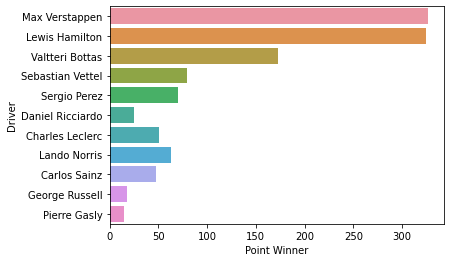

In [337]:
sns.barplot(x = 'Point Winner', y = 'Driver', data=df_new);

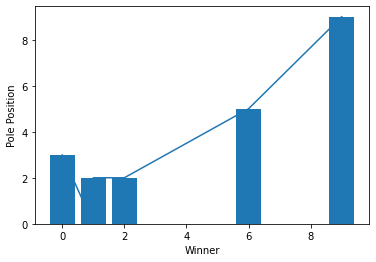

In [357]:
#Find Corelation Pole Position and Winner Formula One
plt.plot(df_new['Winner'], df_new['Pole Position'])
plt.bar(df_new['Winner'], df_new['Pole Position'])
plt.xlabel('Winner')
plt.ylabel('Pole Position')
plt.show()

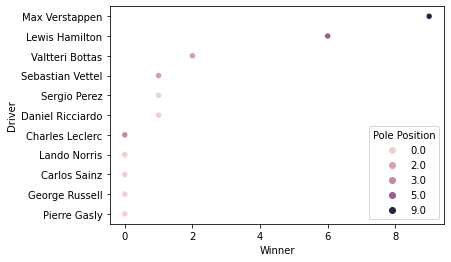

In [367]:
sns.scatterplot(x = 'Winner', y = 'Driver', hue = 'Pole Position', data=df_new);

Congratulation Max Verstappen as the Formula One 2021 champion.
Pole Position is one of factor to get the champion, Max Verstappen got 9 times 1st place with 9 wins on Pole Position.